# Ames Housing Data Analysis

**Previous:** [Modelling](./02_Modelling.ipynb)

## Recommendations to homeowners

#### Imports

In [30]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.metrics import r2_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### Read saved files

In [31]:
df = pd.read_csv('../datasets/df.csv')
df2 = pd.read_csv('../datasets/df_b4dum.csv')
train_clean = pd.read_csv('../datasets/train_clean.csv')
test_clean = pd.read_csv('../datasets/test_clean.csv')

Based on our earlier analyses and identified trends, we have the following recommendations to homeowners

### 1. Area and Quality are key features that add value to houses.

In our lasso model, we have determined features that positively affects the sale price in the modelling. GrLivArea was the strongest feature, followed by other features (OverallQual,ExterQual,KitchenQual) determining the quality of the home.

In [32]:
#### Generally bigger the living area, higher the sale price

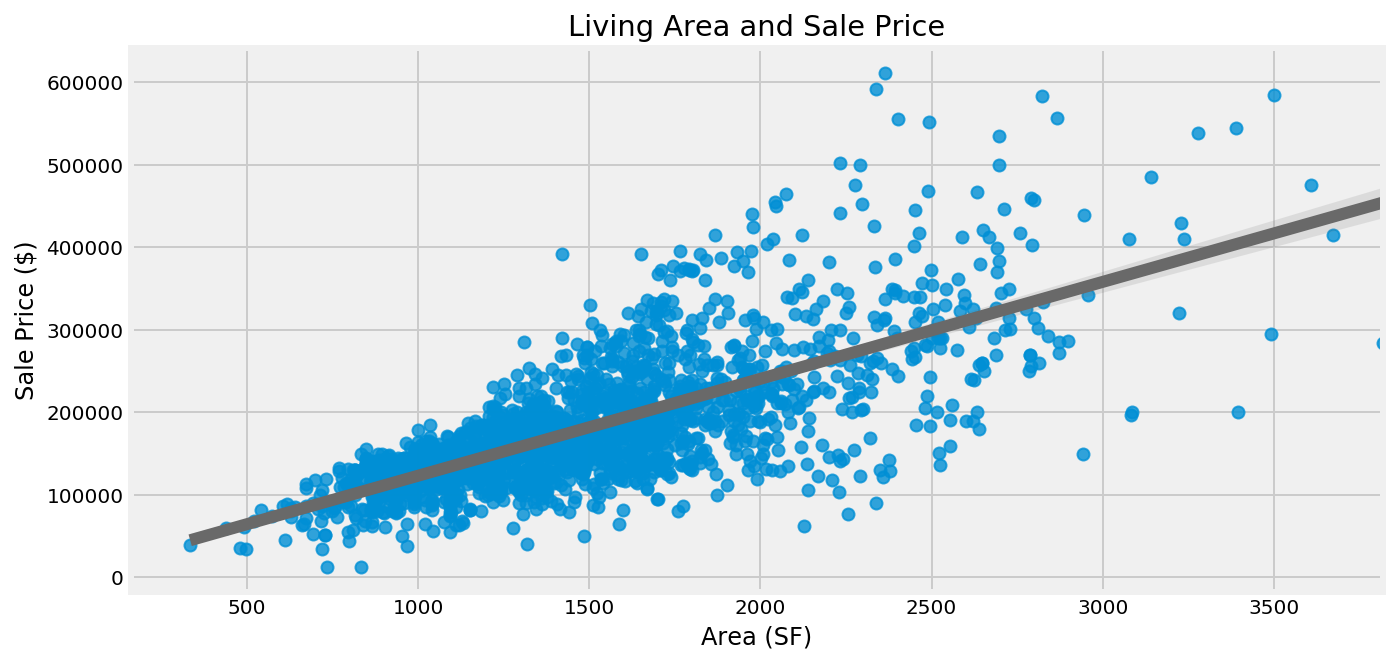

In [33]:
plt.figure(figsize=(10,5))
plt.title('Living Area and Sale Price')
sns.regplot(df['GrLivArea'],df['SalePrice'], line_kws={'color':'dimgrey'});
plt.xlabel('Area (SF)')
plt.ylabel('Sale Price ($)');

In [34]:
#We can see a trend of higher quality(larger numbers) tend to have a higher Sale Price
#higher quality definitely has a higher value if it is kept in a good condition
#also because of it has a higher quality, potential new homeowners would not need to spend additional
#money to refurbish it

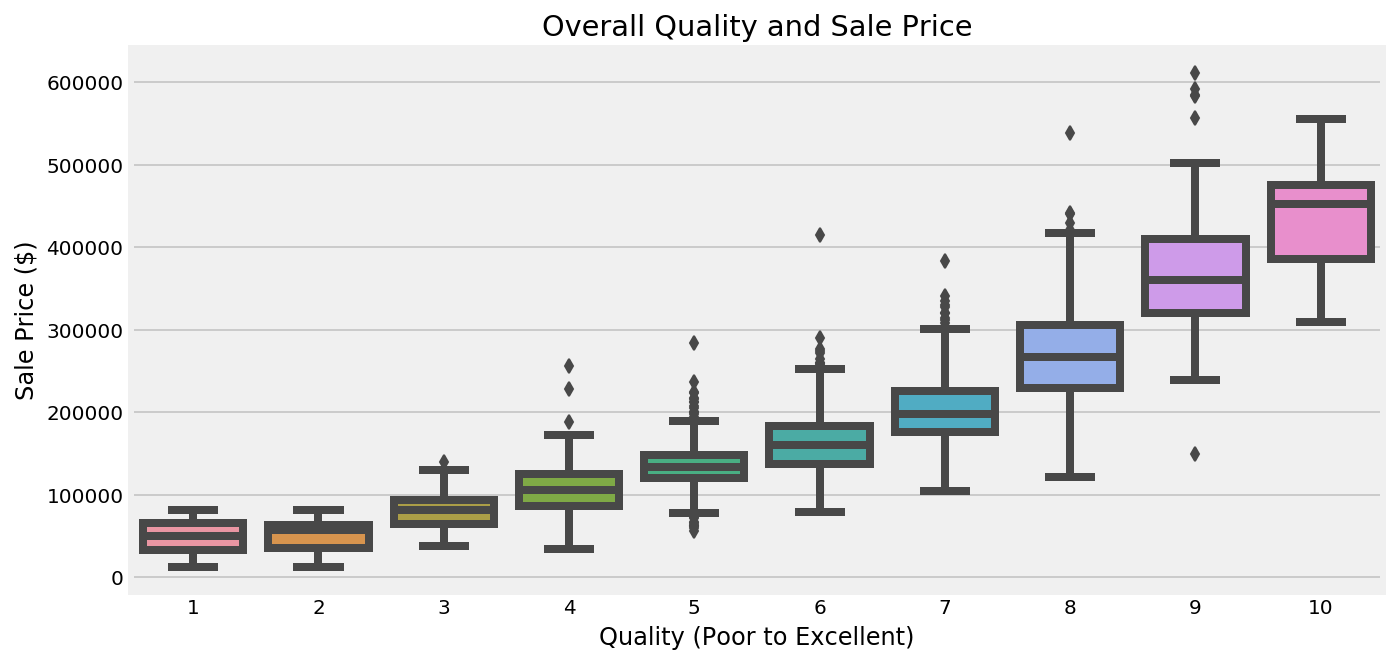

In [35]:
plt.figure(figsize=(10,5))
plt.title('Overall Quality and Sale Price')
sns.boxplot(df['OverallQual'],df['SalePrice']);
plt.xlabel('Quality (Poor to Excellent)')
plt.ylabel('Sale Price ($)');

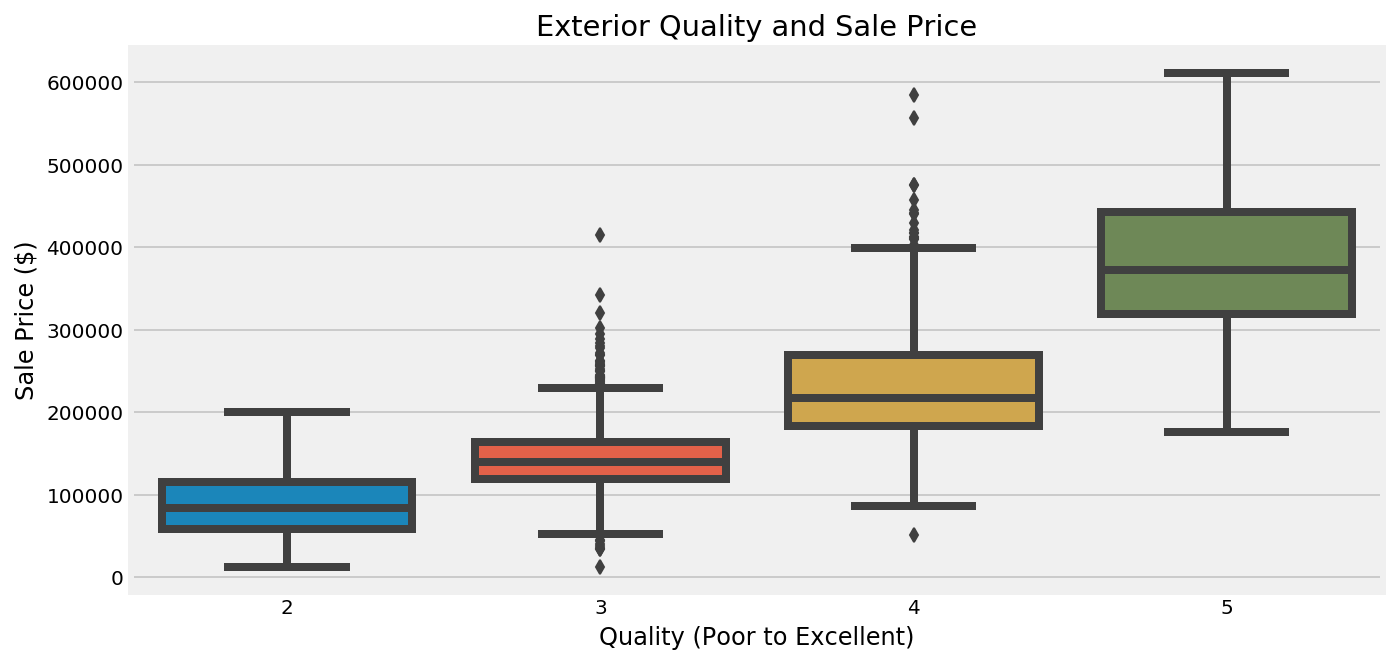

In [36]:
plt.figure(figsize=(10,5))
plt.title('Exterior Quality and Sale Price')
sns.boxplot(df['ExterQual'],df['SalePrice']);
plt.xlabel('Quality (Poor to Excellent)')
plt.ylabel('Sale Price ($)');

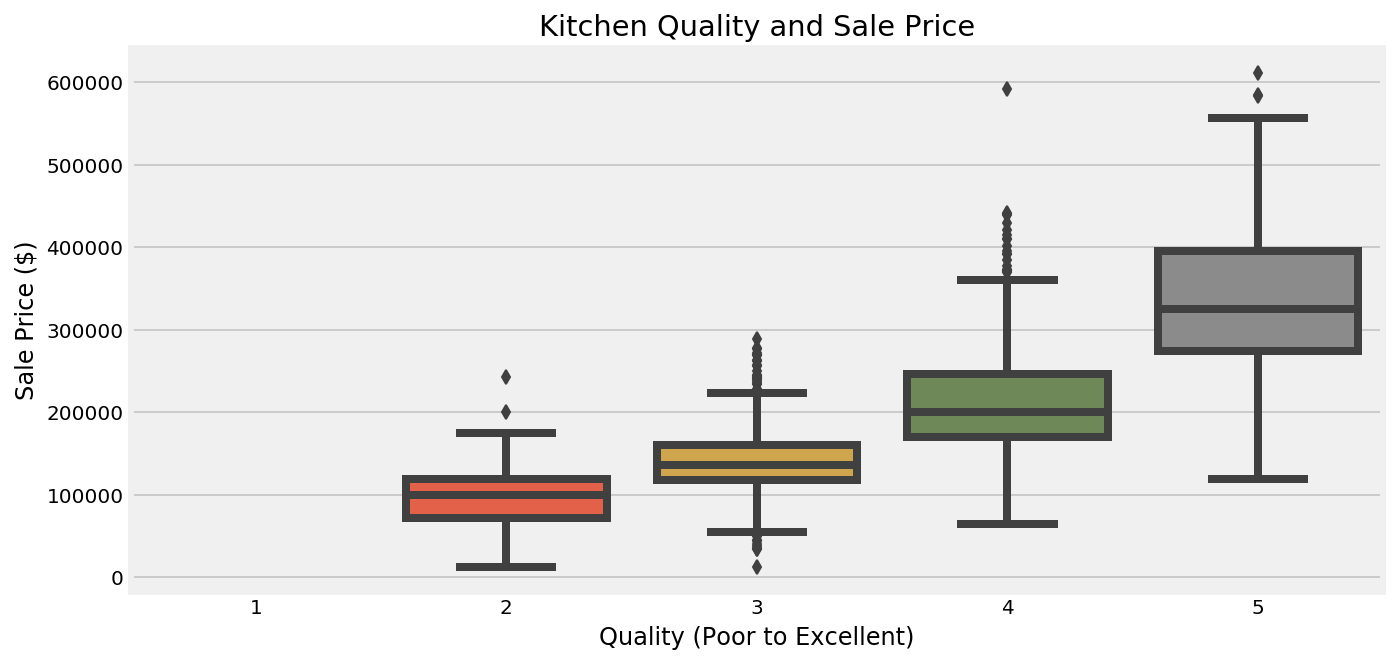

In [37]:
plt.figure(figsize=(10,5))
plt.title('Kitchen Quality and Sale Price')
sns.boxplot(df['KitchenQual'],df['SalePrice']);
plt.xlabel('Quality (Poor to Excellent)')
plt.ylabel('Sale Price ($)');

### 2. Improve Exterior of house and choose the right materials

Homeowners can improve the exterior of their house (roof style, material, Exterior material). Ames, Iowa has a four-season climate and temperature varies a lot during climate changes. Choosing a material strong enough to withstand the climate changes is typically more desirable.

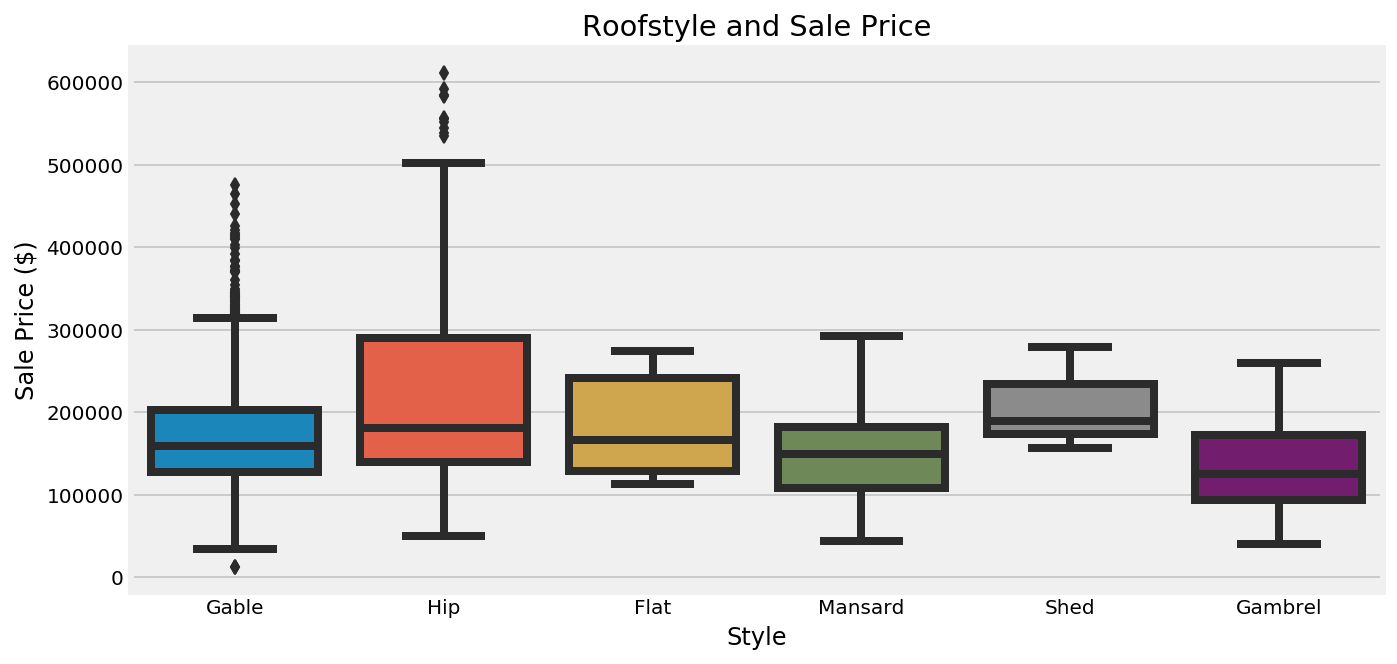

In [38]:
#Go with the Hip roof style
plt.figure(figsize=(10,5))
plt.title('Roofstyle and Sale Price')
sns.boxplot(df2['RoofStyle'],df2['SalePrice']);
plt.xlabel('Style')
plt.ylabel('Sale Price ($)');

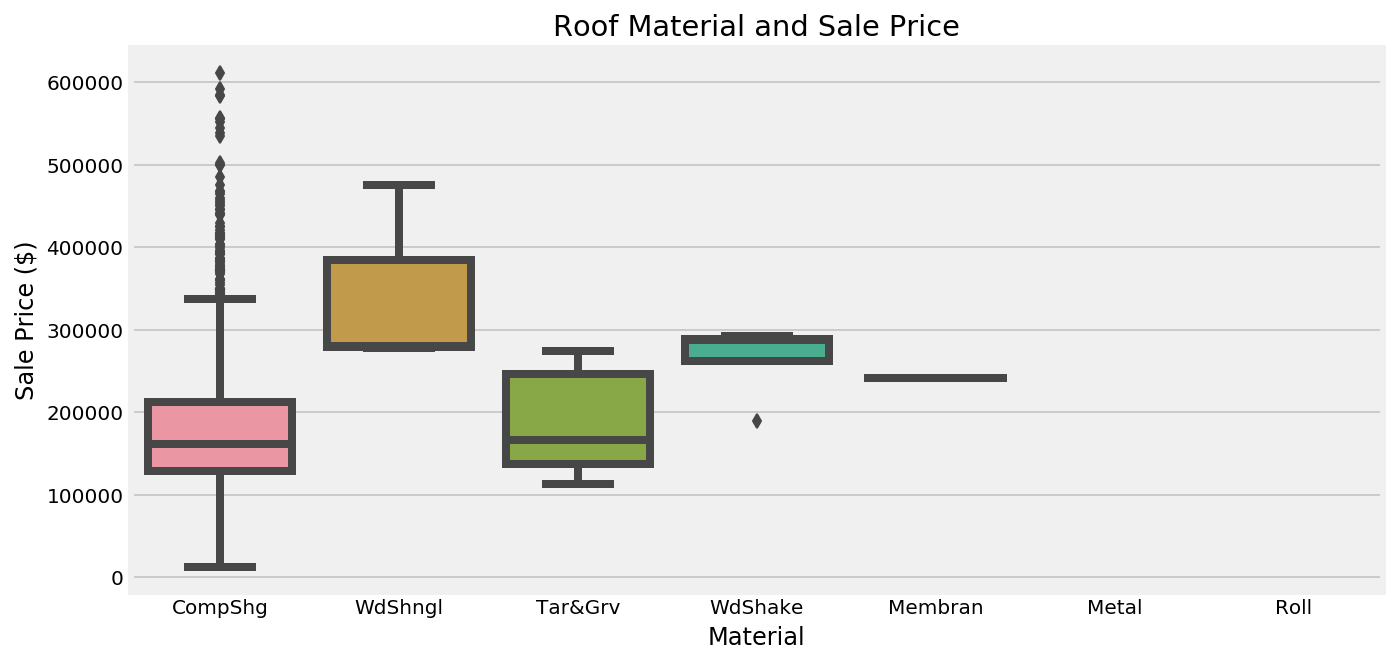

In [39]:
#Wooden roof materials had a higher median selling price
plt.figure(figsize=(10,5))
plt.title('Roof Material and Sale Price')
sns.boxplot(df2['RoofMatl'],df2['SalePrice']);
plt.xlabel('Material')
plt.ylabel('Sale Price ($)');

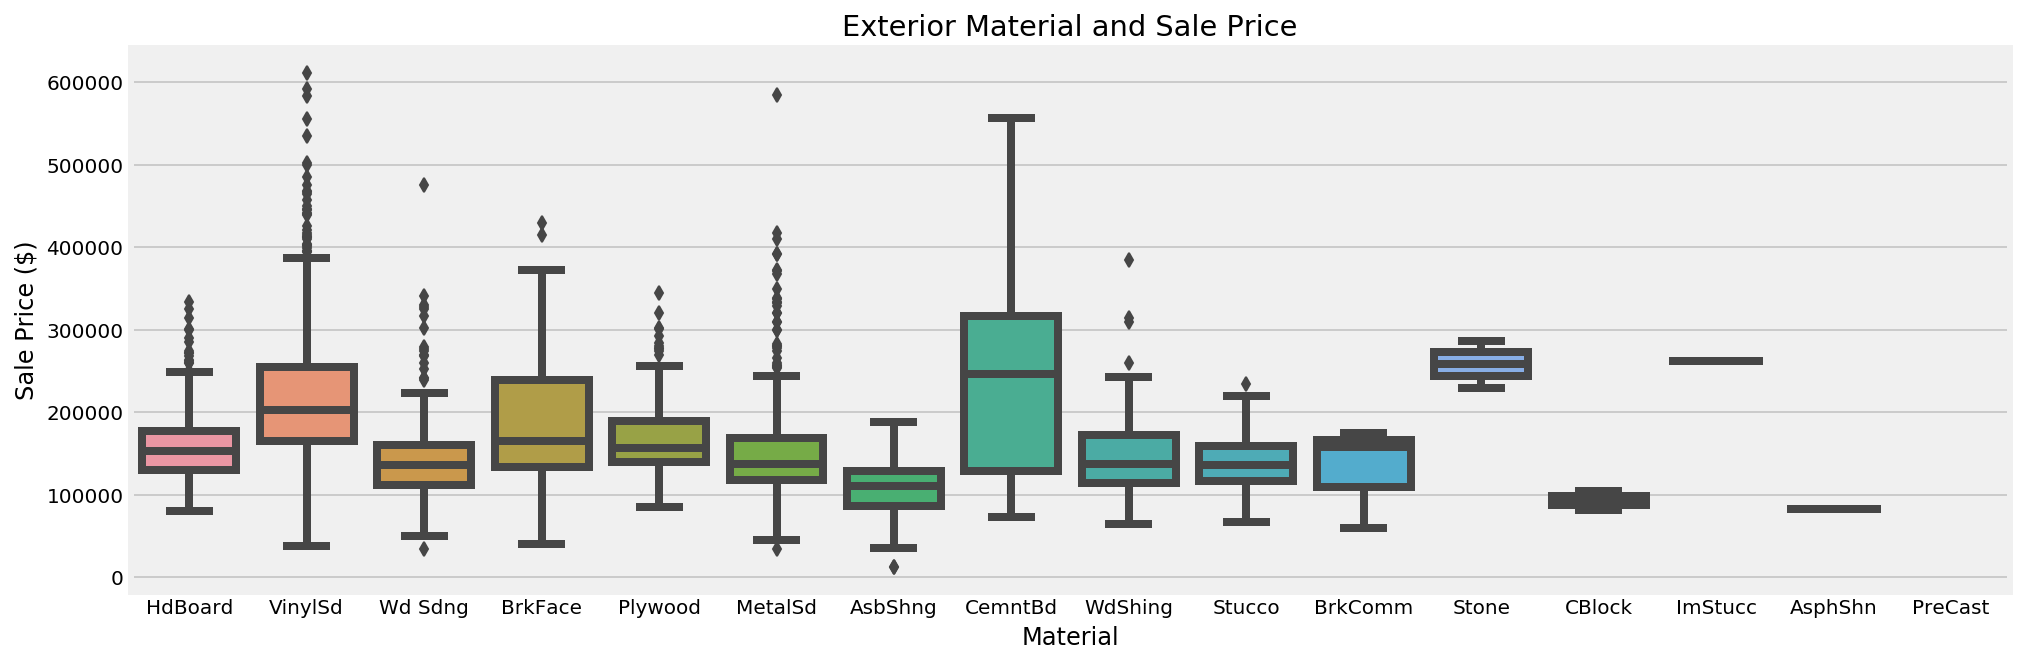

In [40]:
#materials Imitation Stucco and Cement Board fetch a higher median selling price
plt.figure(figsize=(15,5))
plt.title('Exterior Material and Sale Price')
sns.boxplot(df2['Exterior1st'],df2['SalePrice']);
plt.xlabel('Material')
plt.ylabel('Sale Price ($)');

### 3. Invest in the right neighborhood
Generally, Stone Brook, Northridge Heights, and Northridge have a higher mean selling price.


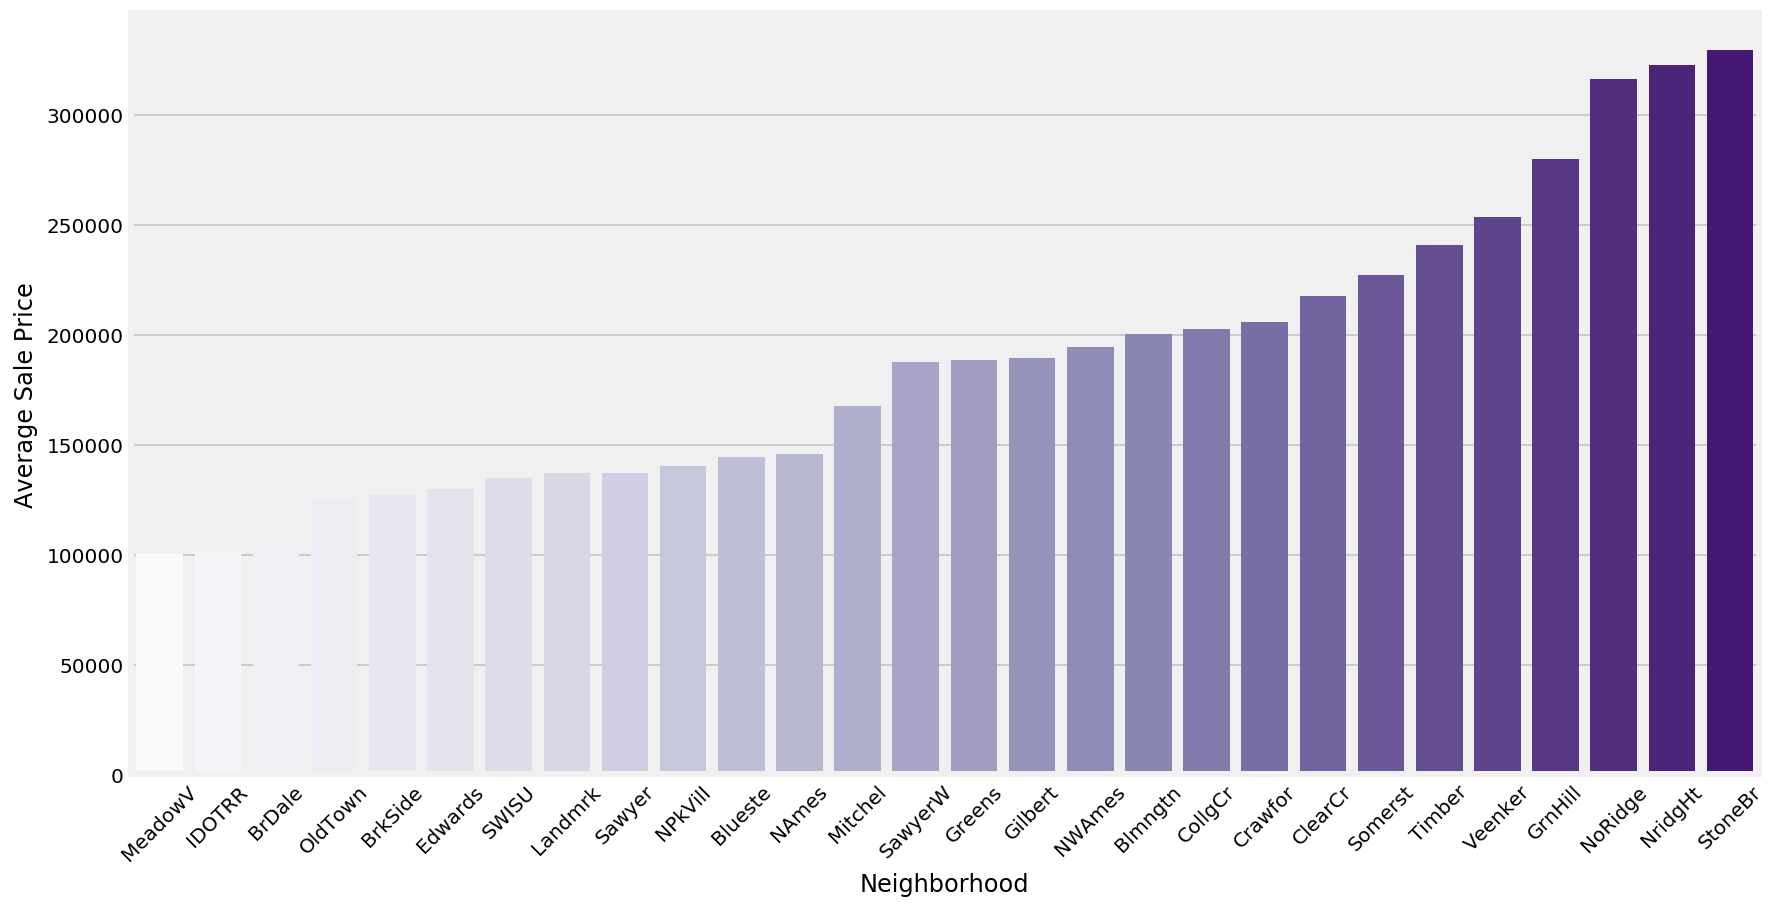

In [41]:
nbh_meanpx = df2.groupby('Neighborhood')['SalePrice'].mean().sort_values().index
meanpx_nbh = df2.groupby('Neighborhood')['SalePrice'].mean().sort_values().values

#Relationship between Neighborhood and Average Sale Price
plt.figure(figsize=(13,7))
sns.barplot(x=nbh_meanpx, y=meanpx_nbh, palette='Purples')
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price');

#Generally, Stone Brook, Northridge Heights, and Northridge have a higher mean selling price



### 4. Brag about your accessibility to certain amenities

Data has shown that properties near or adjacent positive off-site features such as park, or other amenities generally has a higher average selling price.

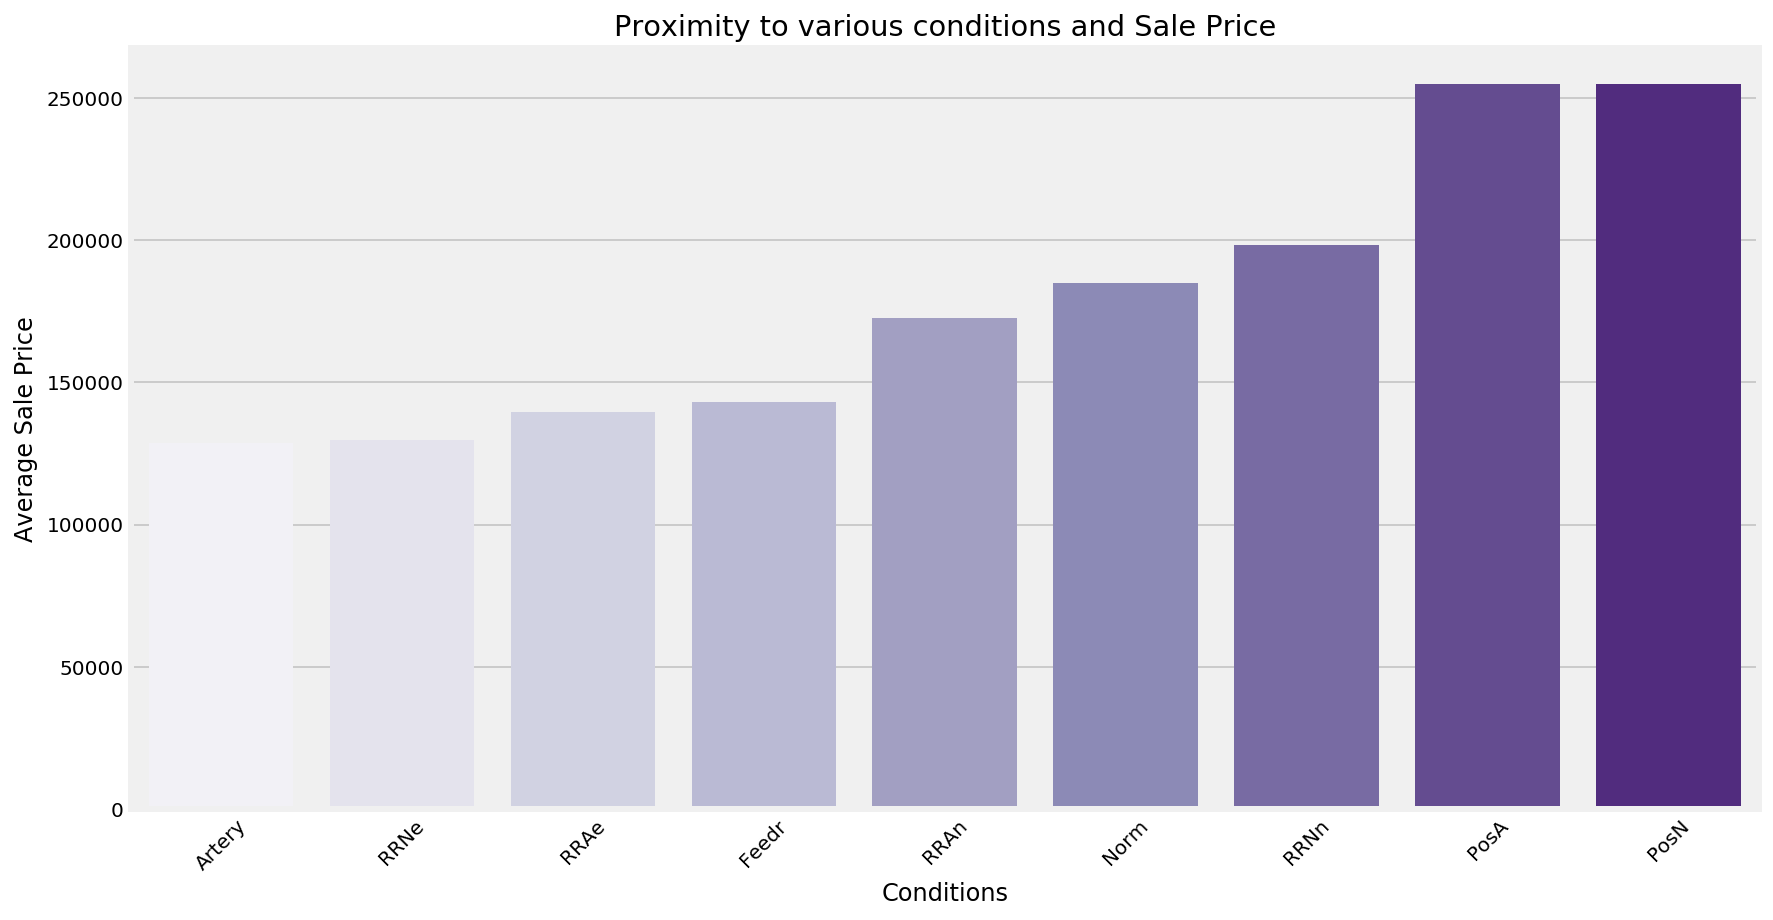

In [42]:
cond1_meanpx = df2.groupby('Condition1')['SalePrice'].mean().sort_values().index
meanpx_cond1 = df2.groupby('Condition1')['SalePrice'].mean().sort_values().values


plt.figure(figsize=(13,7))
sns.barplot(x=cond1_meanpx, y=meanpx_cond1, palette='Purples')
plt.xticks(rotation=45)
plt.title('Proximity to various conditions and Sale Price')
plt.xlabel('Conditions')
plt.ylabel('Average Sale Price');

## Conclusion

Based on past trends in sale prices, we were able to determine certain factors that contributes to a higher sale price of property. This means that homeowners can leverage on the model to predict the price of their property, and be able to determine a good selling price if they are selling their property but do not know where to start.

On the other hand, new and potential homeowners are able to determine if a property is worth its value, and get some knowledge of property prices with or without certain features.


Generally, the trend in property prices are in line with features they are exclusive to. But this does not mean that the model is applicable to other cities where it is an entirely different population, land resources, and priorities of homeowners are different. We are also reminded that higher demand with a limited supply means higher prices. There are other factors that may affect these demands/supply which will likely influence the prediction of prices if we were to use the same features in the prediction model.